## Observations and Insights 

In [43]:
# Dependencies and Setup
%matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/moesterling/Documents/Matplotlib/Unit_05_Matplotlib_Homework_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "C:/Users/moesterling/Documents/Matplotlib/Unit_05_Matplotlib_Homework_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

Using matplotlib backend: Qt5Agg


In [6]:
#Reads data ok
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
#Reads data ok
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single datasets
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mouse_count = len(merged['Mouse ID'].unique())
mouse_count

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged[merged.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all_data = merged.loc[merged['Mouse ID']=="g989"]
duplicate_all_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged = merged.loc[merged['Mouse ID']!="g989"]
clean_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_merged['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_merged.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean")
median = clean_merged.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].rename("Median")
variance = clean_merged.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].rename("Variance")
sd = clean_merged.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].rename("Std. Dev.")
sem = clean_merged.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].rename("SEM")
summary_statistics_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Dev.": sd, "SEM": sem})
summary_statistics_table

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# This method produces everything in a single groupby function
summary_stats = clean_merged.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

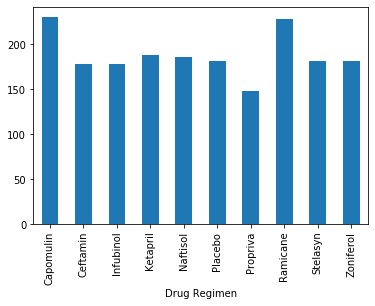

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = clean_merged.groupby("Drug Regimen").count()['Mouse ID']
total_mice.plot(kind="bar");

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.




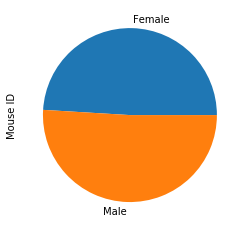

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendered_mice = clean_merged.groupby("Sex").count()['Mouse ID']
gendered_mice.plot(kind="pie");



In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = clean_merged.groupby("Sex").count()['Mouse ID']
plt.pie(male)

([<matplotlib.patches.Wedge at 0x2355befc7c8>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#New Data Frame w/ relevant drugs
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = clean_merged.loc[clean_merged['Drug Regimen'].isin(drug_names)]
final_tumor_volume

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = final_tumor_volume.groupby("Mouse ID").max()['Timepoint']
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_table_merge = pd.merge(max_timepoint, final_tumor_volume, on=["Mouse ID", "Timepoint"])
max_timepoint_table_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    drug_tumor_vol = max_timepoint_table_merge.loc[max_timepoint_table_merge['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(drug_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    mid_q = upper_q - lower_q
    lower_bound = lower_q - (1.5*mid_q)
    upper_bound = lower_q + (1.5*mid_q)
    outliers = drug_tumor_vol.loc[(drug_tumor_vol<lower_bound)|(drug_tumor_vol>upper_bound)]
    print(drug, outliers)
    

Capomulin 32    47.685963
64    46.539206
Name: Tumor Volume (mm3), dtype: float64
Ramicane 62    45.220869
Name: Tumor Volume (mm3), dtype: float64
Infubinol 14    72.226731
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, drug_names)
#this generates in a new pic frame pop up

{'whiskers': [<matplotlib.lines.Line2D at 0x2355c53de88>,
 'caps': [<matplotlib.lines.Line2D at 0x2355c272b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2355c53d648>,
 'medians': [<matplotlib.lines.Line2D at 0x2355c272d08>,
 'fliers': [<matplotlib.lines.Line2D at 0x2355c279dc8>,
 'means': []}

## Line and Scatter Plots

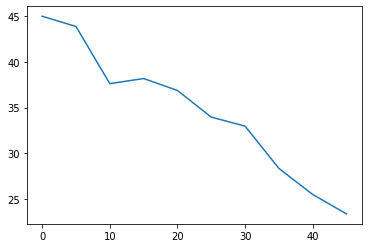

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_merged.loc[clean_merged["Drug Regimen"]=="Capomulin"]
mouse_id = capomulin.loc[capomulin["Mouse ID"]=="s185"]
plt.plot(mouse_id["Timepoint"], mouse_id["Tumor Volume (mm3)"]);


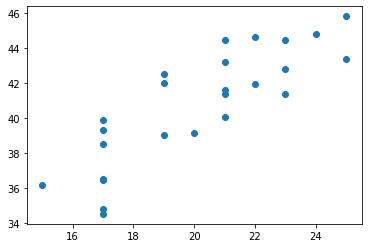

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumorvol = capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
merged_data = pd.merge(mouse_metadata, average_tumorvol, on="Mouse ID")
merged_data.head()
x_axis = merged_data['Weight (g)']
y_axis = merged_data['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis);


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = merged_data['Weight (g)']
tumor_vol = merged_data['Tumor Volume (mm3)']
correl = st.pearsonr(weight, tumor_vol)
print(f"The Correlation between both factors is {round(correl[0],2)}")

The Correlation between both factors is 0.84


The r sqaure is 0.7088568047708717


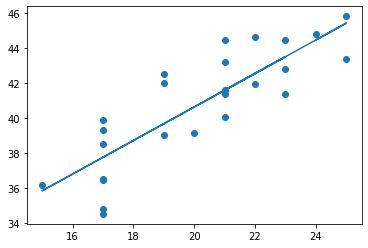

In [60]:
weight = merged_data['Weight (g)']
tumor_vol = merged_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
print(f"The r sqaure is {rvalue**2}")
plt.scatter(weight, tumor_vol);
plt.plot(weight, regress_values);